# Foxp phylogeny tree analysis


In [9]:
! head -2 data/foxp.fasta

>10020:0019a2 {"pub_gene_id":"ENSDORG00000007040", "pub_og_id":"EOG090A05LE", "level":40674, "description":"forkhead box P2 "}
MMQESATETISNSSMNQNGMSTLSSQLDAGSRDGRSSGDTSSEVSTVELLHLQQQQALQAARQLLLQQQTSGLKSPKNSDKQRPLQELLPESKLCVCGHSSGDEHPHNTFAVPVSVAMMTPQVITPQQMQQILQQQVLSPQQLQALLQQQQAVMLQQQQLQEFYKKQQEQLHLQLLQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQPPPPPPHPGKQAKEQQQQQQQQQQLAAQQLVFQQQLIQMQQLQQQQHLLSLQRQGLISIPPGQAALPVQSLPQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSSHEETGASHTLYGHGVCKWPGCESICEDFGQFLKHLNNEHALDDRSTAQCRVQMQVVQQLEIQLSKERERLQAMMTHLHMRPSEPKPSPKPLNLVSSVTMSKNMLETSPQSLPQTPTTPTAPVTPITQGPSVITPASVPNVGAIRRRHSDKYNIPMSSEIAPNYEFYKNADVRPPFTYATLIRQAIMESSDRQLTLNEIYSWFTRTFAYFRRNAATWKNAVRHNLSLHKCFVRVENVKGAVWTVDEVEYQKRRSQKITGSPTLVKNIPTSLGYGAALNASLQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXHSIHVKEEPVIAEDEDCPMSLVTTANHSPELEDDREIEEEPLSEELE


In [10]:
import re

with open('data/foxp.fasta', 'r+') as f:
    data = f.read()
    data = re.sub(':\w{6}', '', data)
    f.close()
    
with open('data/foxp_modified.fasta', 'w') as fwrite:
    fwrite.write(data)
    fwrite.close()

In [11]:
! head -2 data/foxp_modified.fasta

>10020 {"pub_gene_id":"ENSDORG00000007040", "pub_og_id":"EOG090A05LE", "level":40674, "description":"forkhead box P2 "}
MMQESATETISNSSMNQNGMSTLSSQLDAGSRDGRSSGDTSSEVSTVELLHLQQQQALQAARQLLLQQQTSGLKSPKNSDKQRPLQELLPESKLCVCGHSSGDEHPHNTFAVPVSVAMMTPQVITPQQMQQILQQQVLSPQQLQALLQQQQAVMLQQQQLQEFYKKQQEQLHLQLLQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQPPPPPPHPGKQAKEQQQQQQQQQQLAAQQLVFQQQLIQMQQLQQQQHLLSLQRQGLISIPPGQAALPVQSLPQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSSHEETGASHTLYGHGVCKWPGCESICEDFGQFLKHLNNEHALDDRSTAQCRVQMQVVQQLEIQLSKERERLQAMMTHLHMRPSEPKPSPKPLNLVSSVTMSKNMLETSPQSLPQTPTTPTAPVTPITQGPSVITPASVPNVGAIRRRHSDKYNIPMSSEIAPNYEFYKNADVRPPFTYATLIRQAIMESSDRQLTLNEIYSWFTRTFAYFRRNAATWKNAVRHNLSLHKCFVRVENVKGAVWTVDEVEYQKRRSQKITGSPTLVKNIPTSLGYGAALNASLQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXHSIHVKEEPVIAEDEDCPMSLVTTANHSPELEDDREIEEEPLSEELE


In [13]:
# the goal here is to build a standard fasttree
# -a indicates we are using a.a. sequences
# -o refers to the output folder

! ete3 build -w standard_fasttree -a data/foxp_modified.fasta -o foxp_tree/ --clearall

Toolchain path: /Users/csyk2/anaconda3/envs/py27/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build (3.0.0b36) - reproducible phylogenetic workflows 

      Citation: 

       Huerta-Cepas J, Serra F and Bork P. ETE 3: Reconstruction, analysis and
       visualization of phylogenomic data. Mol Biol Evol (2016)
       doi:10.1093/molbev/msw046

      (Note that a list of the external programs used to complete all necessary
      computations will be shown after workflow execution. Those programs should
      also be cited.)

      --------------------------------------------------------------------------------
      
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - Usage for FastTree version 2.1.8 Double precision (No SSE3), OpenMP (1 threads):
         kalign: OK - Kalign version 2.04, Copyright (C) 

In [14]:
# Use tree to check the files in the output folder
# I prefer 'tree' over 'ls' because it gives a more comprehensive view of a folder with sub-folders

! tree foxp_tree/

foxp_tree/
├── clustalo_default-none-none-fasttree_full
│   ├── command_lines
│   ├── commands.log
│   ├── foxp_modified.fasta.final_tree.fa
│   ├── foxp_modified.fasta.final_tree.nw
│   ├── foxp_modified.fasta.final_tree.nwx
│   ├── foxp_modified.fasta.final_tree.png
│   ├── foxp_modified.fasta.final_tree.png.pdf
│   ├── foxp_modified.fasta.final_tree.png.svg
│   ├── foxp_modified.fasta.final_tree.used_alg.fa
│   └── runid
├── db
│   ├── 0078d8b72432a98c90881bddba4170ed.pkl
│   ├── 3c97efafcc36415cbc11950f2b33c882.pkl
│   ├── 4842a9fd3f523645620f2fbf0a41a249.pkl
│   ├── 4864f7d28a7495c84ce1a3d93dec1b45.pkl
│   ├── 5f72001c4f9356f1b3f9706b264414bb.pkl
│   ├── 8697c9cbd75476836da2eb3bfc7ba3dc.pkl
│   ├── 99914b932bd37a50b983c5e7c90ae93b.pkl
│   ├── b5c79641a983efc05f20bb4d4d989c44.pkl
│   ├── b9fbac53bf46f600779572c967e2a28e.pkl
│   ├── ba6ba7bb6ba9d5999f90fefbccc2a006.pkl
│   ├── c48f08f6f3c01fe5e4ca26d2f1e4390d.pkl
│   ├── data.db
│   ├── npr.db
│   └── seq.db
├── ete_build.cfg
└── ta

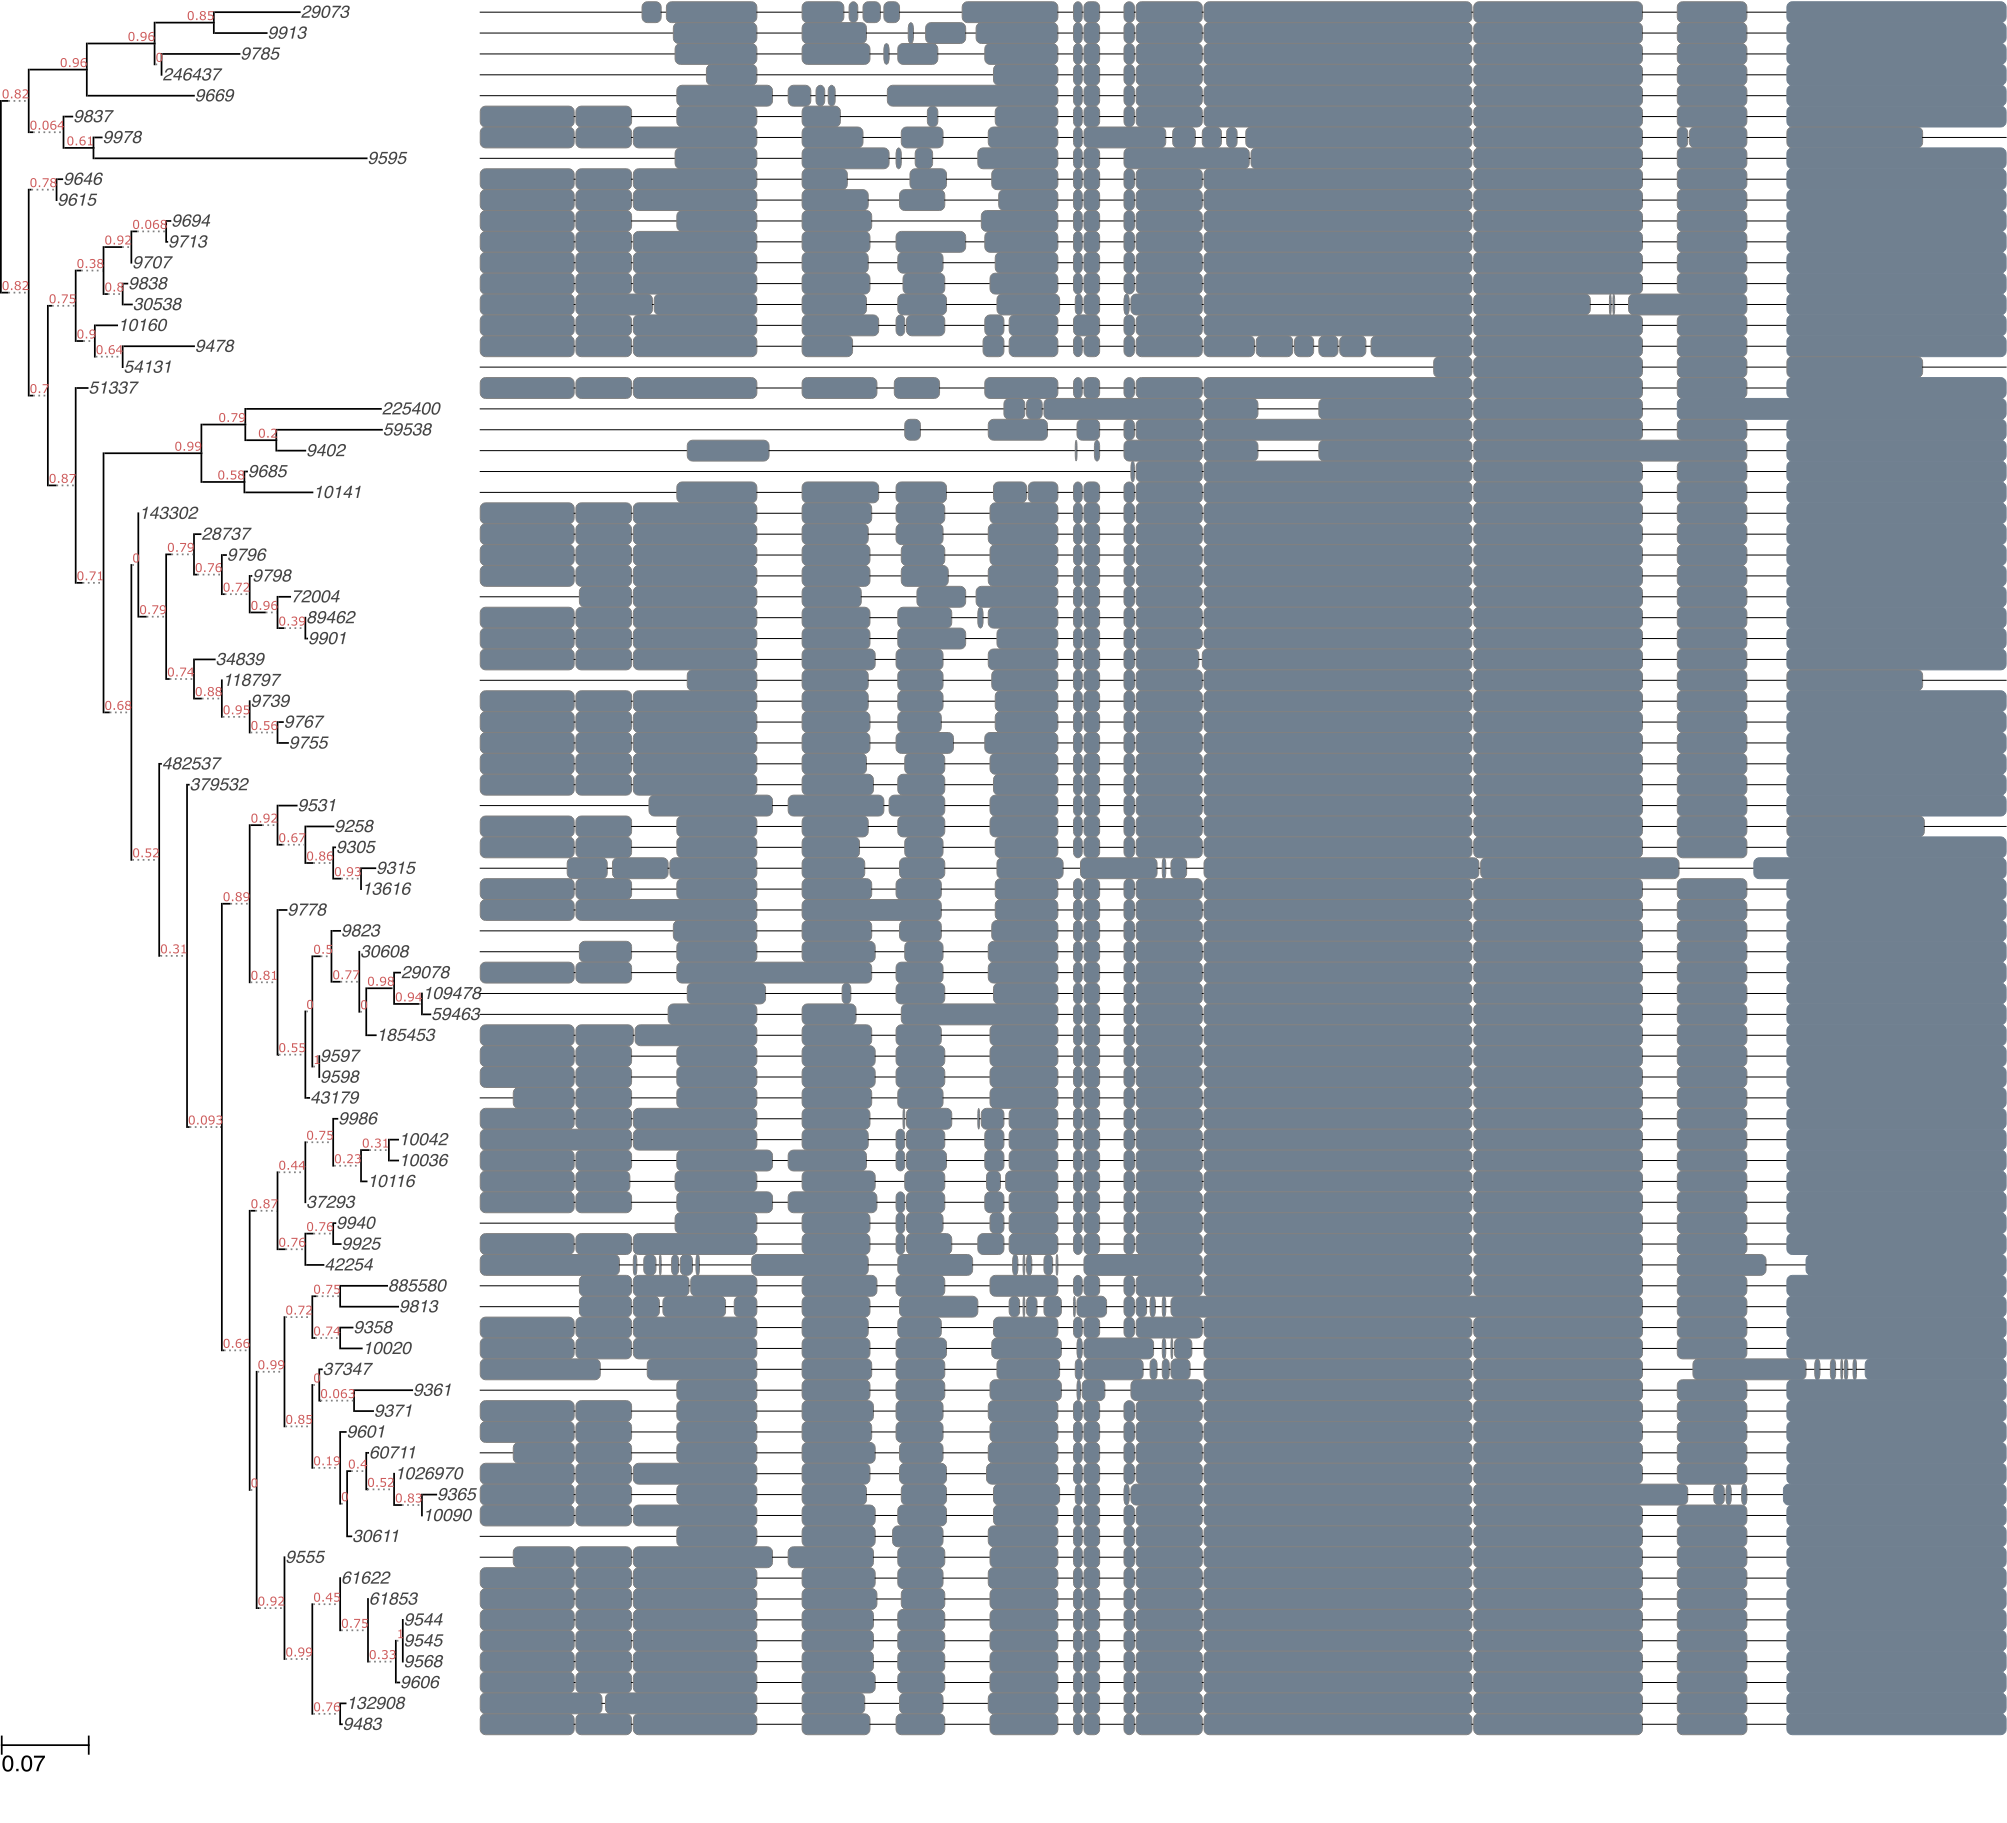

In [15]:
# One clear issue is that the fasta file uses organism ID rather than the organism name,\
# thus, it is hard to 'read' this tree.from IPython.display import Image
from IPython.display import Image
Image(filename='foxp_tree/clustalo_default-none-none-fasttree_full/foxp_modified.fasta.final_tree.png')

In [16]:
# copy the .nw file to the main folder for annotations

! cp foxp_tree/clustalo_default-none-none-fasttree_full/foxp_modified.fasta.final_tree.nw brcatree.nw

In [18]:
# To solve the issue of taxonomy, we use the annotation '--ncbi' and output it into a image:
# brca_tree.png

! ete3 annotate --ncbi -t brcatree.nw | ete3 view --ncbi --image  foxp_tree.png --Iw 1500

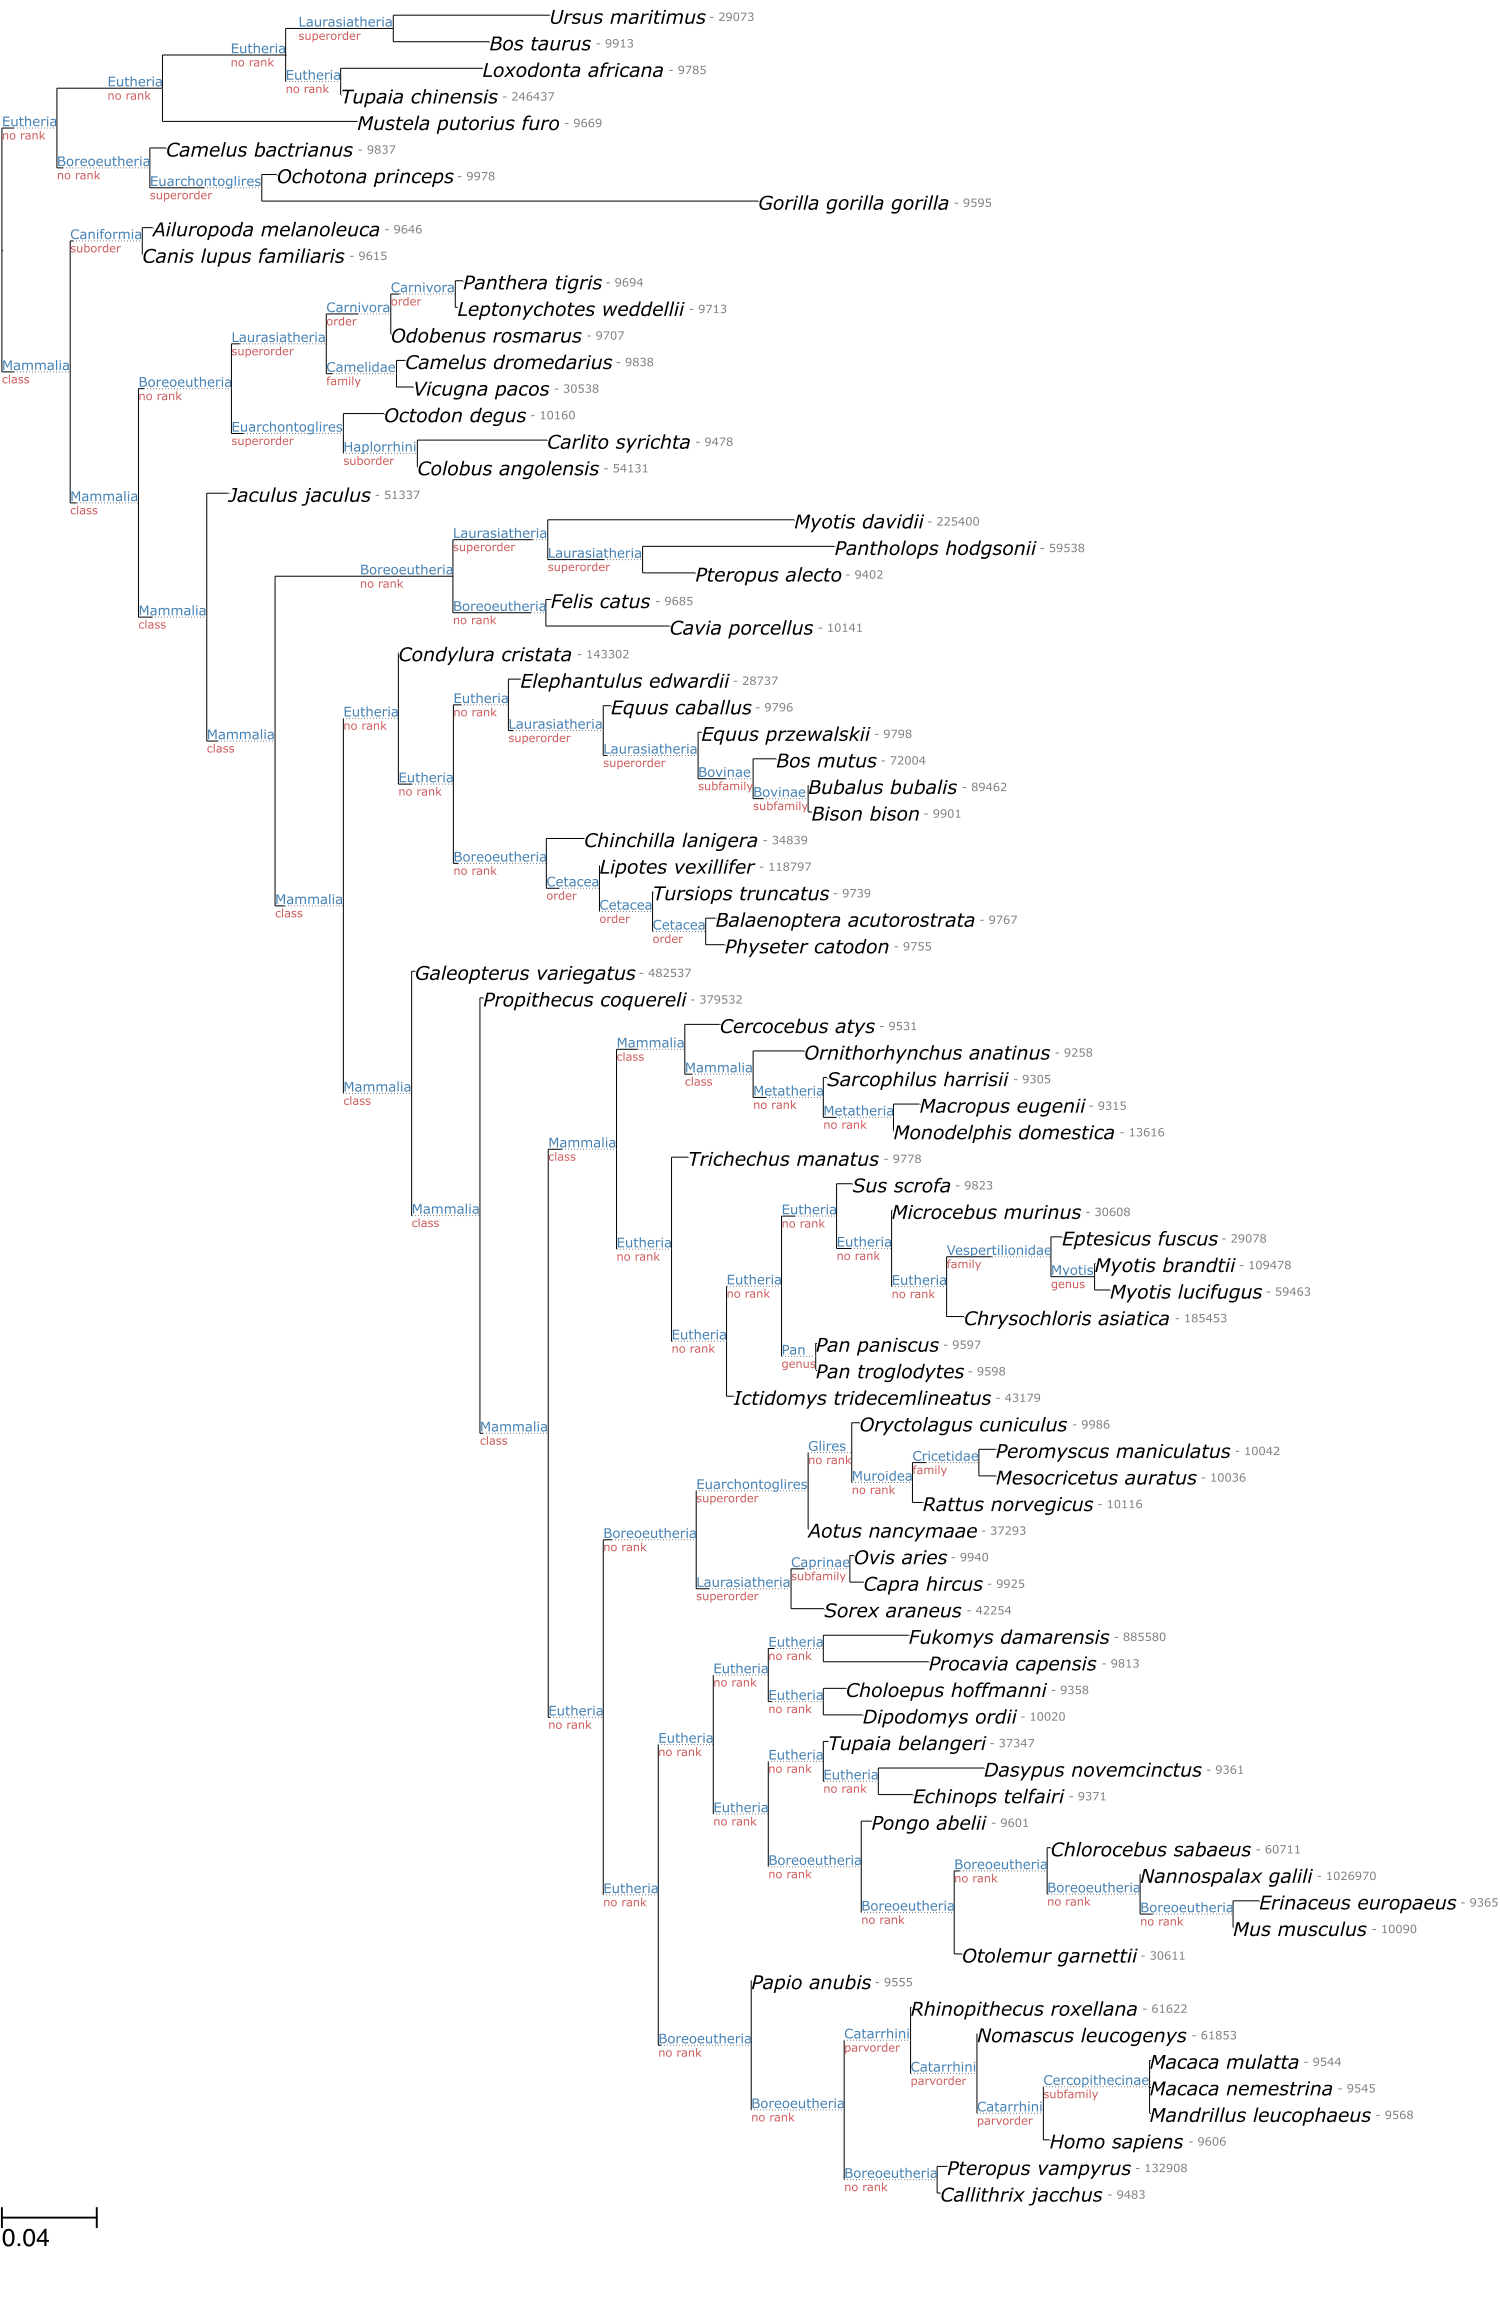

In [19]:
Image('foxp_tree.png')

In [2]:
from ete3 import PhyloTree
t = PhyloTree('brcatree.nw',
              alignment='foxp_tree/clustalo_default-none-none-fasttree_full/foxp_modified.fasta.final_tree.used_alg.fa',
              alg_format="fasta")

In [3]:
t_name_modified = t.annotate_ncbi_taxa(taxid_attr="name")

In [4]:
for n in t.get_leaves():
    try:
        n.name = t_name_modified[0][int(n.name)]
    except Exception as e:
        pass

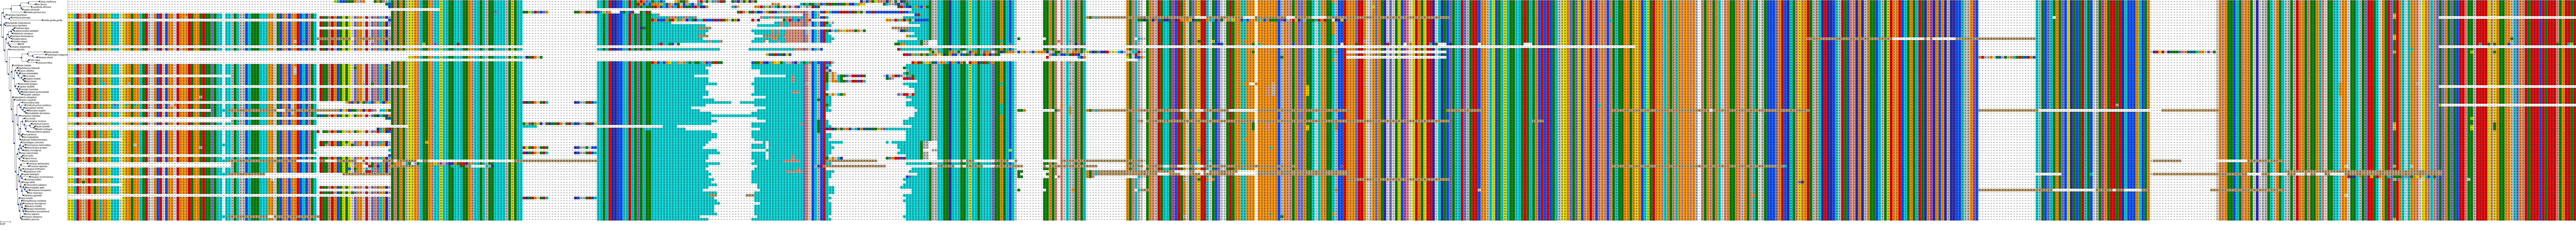

In [5]:
t.render('%%inline')

In [8]:
t.render('foxp.png', dpi = 300)

{'faces': [[107.99658989, 392.0, 164.99658989, 403.0, 63, 'Bison bison'],
  [306.0, 391.0, 306.0, 404.0, 63, None],
  [107.97011378, 379.0, 185.97011378000002, 390.0, 62, 'Bubalus bubalis'],
  [306.0, 378.0, 306.0, 391.0, 62, None],
  [173.0, 1201.0, 234.0, 1212.0, 189, 'aaaaaaaaaq'],
  [119.535054734, 951.0, 206.535054734, 962.0, 148, 'Otolemur garnettii'],
  [306.0, 950.0, 306.0, 963.0, 148, None],
  [63.057969500000006, 2.0, 142.0579695, 13.0, 6, 'Ursus maritimus'],
  [306.0, 1.0, 306.0, 14.0, 6, None],
  [114.207441134, 795.0, 218.20744113400002, 806.0, 127, 'Fukomys damarensis'],
  [306.0, 794.0, 306.0, 807.0, 127, None],
  [60.93590288, 41.0, 142.93590288000001, 52.0, 10, 'Tupaia chinensis'],
  [306.0, 40.0, 306.0, 53.0, 10, None],
  [62.5742051, 15.0, 115.5742051, 26.0, 7, 'Bos taurus'],
  [306.0, 14.0, 306.0, 27.0, 7, None],
  [120.32755832000001,
   860.0,
   233.32755832,
   871.0,
   136,
   'Dasypus novemcinctus'],
  [306.0, 859.0, 306.0, 872.0, 136, None],
  [119.75564792,

In [118]:
# Reference for species

for n in t.get_leaves():
    print n.name

Ursus maritimus
Bos taurus
Loxodonta africana
Tupaia chinensis
Mustela putorius furo
Camelus bactrianus
Ochotona princeps
Gorilla gorilla gorilla
Ailuropoda melanoleuca
Canis lupus familiaris
Panthera tigris
Leptonychotes weddellii
Odobenus rosmarus
Camelus dromedarius
Vicugna pacos
Octodon degus
9478
Colobus angolensis
Jaculus jaculus
Myotis davidii
Pantholops hodgsonii
Pteropus alecto
Felis catus
Cavia porcellus
Condylura cristata
Elephantulus edwardii
Equus caballus
Equus przewalskii
Bos mutus
Bubalus bubalis
Bison bison
Chinchilla lanigera
Lipotes vexillifer
Tursiops truncatus
Balaenoptera acutorostrata
Physeter catodon
Galeopterus variegatus
Propithecus coquereli
Cercocebus atys
Ornithorhynchus anatinus
Sarcophilus harrisii
Macropus eugenii
Monodelphis domestica
Trichechus manatus
Sus scrofa
Microcebus murinus
Eptesicus fuscus
Myotis brandtii
Myotis lucifugus
Chrysochloris asiatica
Pan paniscus
Pan troglodytes
Ictidomys tridecemlineatus
Oryctolagus cuniculus
Peromyscus maniculatus